# Import all the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Import the dataset
link: https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv

In [ ]:
df = pd.read_csv(" https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv")

# Data Analysis(EDA,DM,DC,DE,DV)

In [ ]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
df.shape

(500, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

# Assigning Features and target

In [ ]:
x= np.array(df.Temperature)
y = np.array(df.Revenue)

# Splitting of dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05)

# Choosing the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=10,random_state=0)

# Training the model

In [ ]:
regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

<ipython-input-17-fe775d2e6d90>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=0)

<ipython-input-18-fe775d2e6d90>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=0)

# Testing the model

In [ ]:
y_pred = regressor.predict(x_test.reshape(-1,1))

In [ ]:
pred  = pd.DataFrame({"Actual":y_test.reshape(-1),"Prediction":y_pred.reshape(-1)})

In [ ]:
pred.head()

,Actual,Prediction
0,528.116240,508.883735
1,631.318237,647.656681
2,322.983977,372.707222
3,306.749930,286.591397
4,374.231135,391.867548


Text(0.5, 1.0, 'Temperature v/s Revenue')

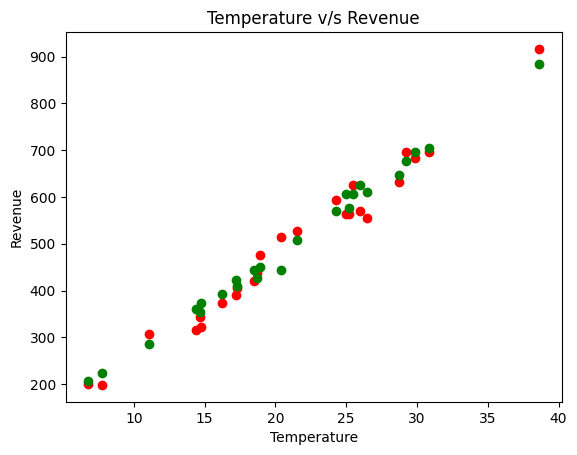

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='green')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature v/s Revenue')

<Axes: >

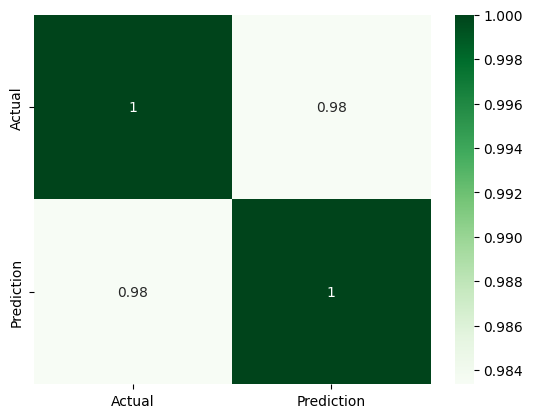

In [ ]:
sns.heatmap(pred.corr(),annot=True, cmap='Greens')

# Performance

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.9647193715707173